In [78]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [79]:
start=time.time()
path ="data/insurance.csv"
data = pd.read_csv(path)
end=time.time()
print(end-start)
data

0.002494335174560547


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [81]:
data.sex.value_counts()
print(data.columns)
data=data.join(pd.get_dummies(data.sex)).drop(['sex'],axis=1)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [82]:
data.region.value_counts()
data = data.join(pd.get_dummies(data.region)).drop(['region'],axis=1)

In [83]:
data

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,True,False,False,False,False,True
1,18,33.770,1,no,1725.55230,False,True,False,False,True,False
2,28,33.000,3,no,4449.46200,False,True,False,False,True,False
3,33,22.705,0,no,21984.47061,False,True,False,True,False,False
4,32,28.880,0,no,3866.85520,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,False,True,False,True,False,False
1334,18,31.920,0,no,2205.98080,True,False,True,False,False,False
1335,18,36.850,0,no,1629.83350,True,False,False,False,True,False
1336,21,25.800,0,no,2007.94500,True,False,False,False,False,True


In [84]:
data.replace('yes',1,inplace=True)
data.replace('no',0,inplace=True)

In [85]:
data

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,True,False,False,False,False,True
1,18,33.770,1,0,1725.55230,False,True,False,False,True,False
2,28,33.000,3,0,4449.46200,False,True,False,False,True,False
3,33,22.705,0,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,0,3866.85520,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,False,True,False,True,False,False
1334,18,31.920,0,0,2205.98080,True,False,True,False,False,False
1335,18,36.850,0,0,1629.83350,True,False,False,False,True,False
1336,21,25.800,0,0,2007.94500,True,False,False,False,False,True


<Axes: >

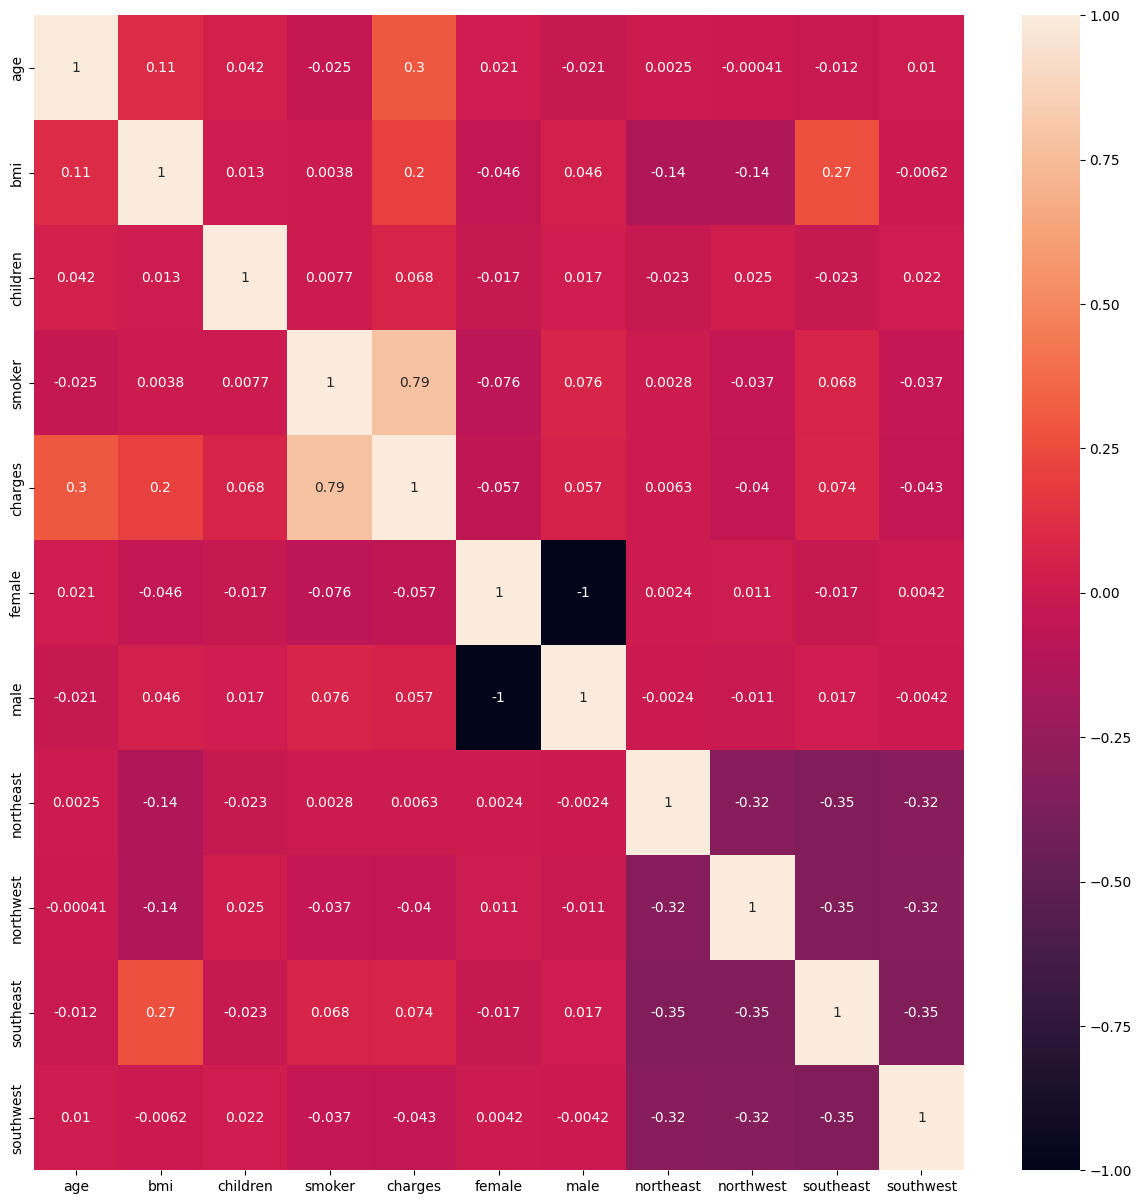

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [87]:
x_data = data.drop(['charges'],axis=1)
y_data = data['charges']

In [88]:
model=LinearRegression()
model.fit(x_data,y_data)

LinearRegression()

In [89]:
predict = model.predict(x_data)
print(data.columns)
score=model.score(x_data,y_data)
print(score)

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'female', 'male',
       'northeast', 'northwest', 'southeast', 'southwest'],
      dtype='object')
0.7509130345985207
